In [21]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.api import Logit
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('http://opendata.dete.qld.gov.au/human-resources/dete-exit-survey-january-2014.csv')

In [32]:
df.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Region,Employment Status,Career move to public sector,Career move to private sector,...,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Length,General Dissatisfaction,Career Move
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,Central Office,Permanent Full-time,True,False,...,A,A,N,N,N,Male,56-60,28.0,True,True
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,Central Office,Permanent Full-time,False,False,...,A,A,N,N,N,Male,56-60,NaN,False,False
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,Central Office,Permanent Full-time,False,False,...,A,N,N,N,N,Male,61 or older,1.0,False,False
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Central Queensland,Permanent Full-time,False,True,...,A,A,A,N,A,Female,36-40,7.0,False,True
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,South East,Permanent Full-time,False,False,...,D,A,N,A,M,Female,61 or older,42.0,False,False


# Purpose of project

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Read Me File

This is employee exit survey data conducted by the Department of Education in Queensland Australia.  The DETE Exit Survey was developed to effectively canvass the opinions and attitudes of departing employees to identify a wide range of operational, organisational and personal 
variables affecting the decision to leave. 

The point of this project is to clean the dataset and perform an exploratory data analysis to answer the following questions:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The survey data had stopped being updated long ago so while features are self-explanatory (for the most part), some of the values we're taking our best guess on

Source: https://www.data.qld.gov.au/dataset/employee-exit-survey-dete

In [4]:
df.shape

(822, 56)

In [5]:
df.dtypes

ID                                      int64
SeparationType                         object
Cease Date                             object
DETE Start Date                        object
Role Start Date                        object
Position                               object
Classification                         object
Region                                 object
Business Unit                          object
Employment Status                      object
Career move to public sector             bool
Career move to private sector            bool
Interpersonal conflicts                  bool
Job dissatisfaction                      bool
Dissatisfaction with the department      bool
Physical work environment                bool
Lack of recognition                      bool
Lack of job security                     bool
Work location                            bool
Employment conditions                    bool
Maternity/family                         bool
Relocation                        

In [6]:
df.isna().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [3]:
#Start with the features missing the most values then work our way down

df[df['Torres Strait'] == 'Yes']

#Seems to have something to do with minority groups.  Of the 3 Yes', 2 are also a Yes for the South Sea and aboriginal.  Don't seem relevant to the
#questions at hand, and considering the vast majority are missing, opting to drop those 3 columns

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
527,528,Age Retirement,2012,1986,1986,Teacher Aide,NaN,Central Queensland,NaN,Permanent Part-time,...,A,N,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
643,644,Voluntary Early Retirement (VER),08/2013,1982,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,SA,A,A,Female,56-60,NaN,Yes,NaN,NaN,NaN
680,682,Contract Expired,12/2013,2013,2013,Public Servant,A01-A04,Central Office,Other,Temporary Part-time,...,A,A,A,Female,21-25,Yes,Yes,Yes,NaN,NaN


In [4]:
df.drop(columns = ['Torres Strait', 'Aboriginal', 'South Sea'], inplace = True)

#Also dropping disability and NESB since they're binary and over 95% missing

df.drop(columns = ['Disability', 'NESB'], inplace = True)

In [5]:
#business unit has 84% of values missing

df['Business Unit'].value_counts()

#Without further information, best guess is this is a broader classification of the position the employee was in, so appears to be overlapping
#information.  Deleting

df.drop(columns = ['Business Unit'], inplace = True)

In [5]:
#44% missing values

df['Classification'].value_counts()

df[['Classification', 'Position']].head(20)

#Appear to be a further subdivision of position.  Not relevant so deleting

,Classification,Position
0,A01-A04,Public Servant
1,AO5-AO7,Public Servant
2,NaN,Schools Officer
3,Primary,Teacher
4,NaN,Head of Curriculum/Head of Special Education
5,NaN,Guidance Officer
6,Secondary,Teacher
7,NaN,Teacher Aide
8,Secondary,Teacher
9,NaN,Teacher Aide


In [6]:
df.drop(columns = ['Classification'], inplace = True)

In [13]:
df.isna().sum()

ID                                      0
SeparationType                          0
Cease Date                              0
DETE Start Date                         0
Role Start Date                         0
Position                                5
Region                                  0
Employment Status                       5
Career move to public sector            0
Career move to private sector           0
Interpersonal conflicts                 0
Job dissatisfaction                     0
Dissatisfaction with the department     0
Physical work environment               0
Lack of recognition                     0
Lack of job security                    0
Work location                           0
Employment conditions                   0
Maternity/family                        0
Relocation                              0
Study/Travel                            0
Ill Health                              0
Traumatic incident                      0
Work life balance                 

In [9]:
df['Opportunities for promotion'].value_counts()

#Consulted with my business associate chat gpt, they seem to think that the codes stand for Agree, Neutral, Strongly Agree, etc.  Quite clever,
#it's why I keep them around.  87 missing values so we'll impute those with M which we think stands for missing/NA

###Update to the above, imputing them as all missing would skew the current distribution arbitrarily, 
###so going to impute on a proportional basis

Opportunities for promotion
A     242
N     230
SA    100
D      83
SD     56
M      24
Name: count, dtype: int64

In [10]:
df['Coach'].value_counts()

#sum is 767

#Probably something about access to coaching?  A - agree, SA - Strongly agree etc

Coach
A     345
SA    157
N     141
D      65
SD     37
M      22
Name: count, dtype: int64

# Imputing missing values proportionally
***Several columns appear to be missing values on a Likert Scale so creating a function to deal with that***

In [7]:
def replace_na(df):
    columns = [col for col in df.columns if df[col].isna().sum() > 0]
    for column in columns:
        is_na = df[column].isna().sum()
        not_na = len(df) - is_na
        values_to_fill = {df[column].value_counts().index[i]: round(df[column].value_counts().iloc[i] / not_na * is_na) 
                          for i in range(len(df[column].value_counts()))
                          if round(df[column].value_counts().iloc[i] / not_na * is_na) != 0}
        
        # Get indices of missing values
        nan_indices = df[df[column].isna()].index.tolist()

        # For each category, fill the required number of NaN entries
        for value, count in values_to_fill.items():
            
            #Ensure count doesn't exceed length of nan_indicies
            count = min(count, len(nan_indices))
            
            # Randomly sample indices for this value
            chosen_indices = random.sample(nan_indices, count)
    
            # Assign the value to those indices
            df.loc[chosen_indices, column] = value
    
            # Remove assigned indices from the list of NaN indices
            nan_indices = list(set(nan_indices) - set(chosen_indices))
            
        if df[column].isna().sum() > 0 and values_to_fill:
            print(f"{column} has NA")
            most_frequent_value = max(values_to_fill, key=values_to_fill.get)
            df[column] = df[column].fillna(most_frequent_value)

replace_na(df)

Stress and pressure support has NA
Peer support has NA
Initiative has NA
Information has NA
Wellness programs has NA


In [7]:
#Check if any NA left

df.isna().any().any()

False

# Does length of employment effect reason for leaving?

In [88]:
df['Cease Date'].value_counts()

Cease Date
2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2014         2
07/2014         2
08/2012         2
04/2013         2
02/2014         2
11/2012         1
09/2010         1
2010            1
2014            1
07/2012         1
09/2014         1
07/2006         1
Name: count, dtype: int64

In [89]:
df['Role Start Date'].value_counts()

Role Start Date
Not Stated    98
2012          65
2011          57
2010          46
2008          45
2013          41
2007          41
2009          38
2006          25
2004          22
2000          20
2005          20
2003          20
1999          19
1996          19
1989          18
1992          17
2002          16
2001          15
1998          15
1988          14
1995          13
1997          13
1975          12
1990          12
1986          11
1978           9
1976           9
1993           9
1991           8
1979           7
1994           7
1985           6
1981           5
1983           5
1987           5
1984           4
1982           4
1980           3
1970           2
1977           2
200            1
1974           1
1971           1
1973           1
1972           1
Name: count, dtype: int64

In [90]:
df['DETE Start Date'].value_counts()

DETE Start Date
Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
1970          21
2013          21
1975          21
2005          20
1990          20
1996          19
1999          19
2000          18
1992          18
2004          18
1991          18
1989          17
1976          15
2002          15
1978          15
2003          15
1988          15
1974          14
1980          14
1995          14
1998          14
1997          14
1979          14
1993          13
1986          12
1972          12
1977          11
1971          10
2001          10
1984          10
1969          10
1994          10
1981           9
1983           9
1985           8
1973           8
1987           7
1963           4
1982           4
1968           3
1967           2
1966           1
1965           1
Name: count, dtype: int64

## Creating a new feature for length of employment
**Using DETE as start date (stands for Department of Education, Training and Employment)**

In [8]:
# Extract year or keep 'Not Stated'
df['year'] = df['Cease Date'].apply(lambda x: x[-4:] if x != 'Not Stated' else x)

# Calculate 'Length' while handling 'Not Stated' values
df['Length'] = df.apply(
    lambda row: np.nan if row['DETE Start Date'] == 'Not Stated' or row['year'] == 'Not Stated'
    else int(row['year']) - int(row['DETE Start Date']),
    axis=1
)

# For values that were "Not Stated", replacing those with NaN in order to calculate the numerical value of length of employment

df.drop(columns = 'year', axis = 1, inplace = True)

## Explore different correlations with reason for leaving and length of employment

In [165]:
df['Job dissatisfaction'].value_counts()

Job dissatisfaction
False    733
True      89
Name: count, dtype: int64

In [99]:
df['Dissatisfaction with the department'].value_counts()

Dissatisfaction with the department
False    761
True      61
Name: count, dtype: int64

In [167]:
df.groupby('Job dissatisfaction')['Length'].mean()

Job dissatisfaction
False    18.182677
True     19.869048
Name: Length, dtype: float64

<mark>Average length of stay is about the same for groups who left because of job dissatisfication and those who left for other reasons<mark>

In [169]:
df.groupby('Dissatisfaction with the department')['Length'].mean()

Dissatisfaction with the department
False    18.317700
True     19.086207
Name: Length, dtype: float64

<mark>Same as the job dissatisfaction group, doesn't appear to be affected by length of stay<mark>

In [92]:
df.groupby('Age')['Length'].mean()

Age
20 or younger     1.000000
21-25             2.162162
26-30             4.826923
31-35             5.324324
36-40             7.191489
41-45            10.232143
46-50            13.566038
51-55            22.239583
56-60            26.821918
61 or older      25.798969
Name: Length, dtype: float64

<mark>Older they are, more likely their length of employment seems to be, makes sense<mark>

In [95]:
df['Job dissatisfaction'][df['Length'].isna() == True].value_counts()

Job dissatisfaction
False    98
True      5
Name: count, dtype: int64

<mark>Start or termination date not being stated overwhelmingly favors those who didn't leave because of job dissatisfaction<mark>

In [93]:
df['SeparationType'][df['Length'].isna() == True].value_counts()

SeparationType
Age Retirement                          37
Resignation-Other reasons               17
Ill Health Retirement                   12
Resignation-Other employer              11
Resignation-Move overseas/interstate    10
Other                                    8
Contract Expired                         5
Voluntary Early Retirement (VER)         2
Termination                              1
Name: count, dtype: int64

<mark>if start or end date not stated, then mainly leaving because of retirement or other reasons<mark>

In [97]:
df.groupby('SeparationType')['Length'].mean()

SeparationType
Age Retirement                          28.205645
Contract Expired                         3.896552
Ill Health Retirement                   21.795918
Other                                   11.292683
Resignation-Move overseas/interstate     6.350000
Resignation-Other employer              10.462500
Resignation-Other reasons               12.308271
Termination                             12.285714
Voluntary Early Retirement (VER)        23.830769
Name: Length, dtype: float64

In [100]:
counts = df.groupby('SeparationType')['Job dissatisfaction'].value_counts()

proportions = counts / counts.groupby(level = 0).sum()

proportion_table = proportions.reset_index(name = 'Proportion')

print(proportion_table)

                          SeparationType  Job dissatisfaction  Proportion
0                         Age Retirement                False    0.915789
1                         Age Retirement                 True    0.084211
2                       Contract Expired                False    0.970588
3                       Contract Expired                 True    0.029412
4                  Ill Health Retirement                False    0.901639
5                  Ill Health Retirement                 True    0.098361
6                                  Other                False    0.897959
7                                  Other                 True    0.102041
8   Resignation-Move overseas/interstate                False    0.914286
9   Resignation-Move overseas/interstate                 True    0.085714
10            Resignation-Other employer                False    0.857143
11            Resignation-Other employer                 True    0.142857
12             Resignation-Other reaso

<mark>Available evidence suggests that length of employment doesn't seem to correlate to whether or not that individual left because of job dissatisfaction.  There may however be an effect given Separation type.  Overall though the sample is too small and too much of an imbalance to draw any strong conclusions<mark>

# Exploring if age and job dissatisfaction have any relationship

In [117]:
age_counts = df.groupby('Age')['Job dissatisfaction'].value_counts()

age_proportions = age_counts / age_counts.groupby(level = 0).sum()

age_table = age_proportions.reset_index(name = 'Proportion')

print(age_table)

              Age  Job dissatisfaction  Proportion
0   20 or younger                False    1.000000
1           21-25                False    0.926829
2           21-25                 True    0.073171
3           26-30                False    0.810345
4           26-30                 True    0.189655
5           31-35                False    0.846154
6           31-35                 True    0.153846
7           36-40                False    0.865385
8           36-40                 True    0.134615
9           41-45                False    0.919355
10          41-45                 True    0.080645
11          46-50                False    0.921875
12          46-50                 True    0.078125
13          51-55                False    0.817308
14          51-55                 True    0.182692
15          56-60                False    0.914773
16          56-60                 True    0.085227
17    61 or older                False    0.920000
18    61 or older              

In [118]:
age_counts01 = df.groupby('Age')['Dissatisfaction with the department'].value_counts()

age_proportions01 = age_counts01 / age_counts01.groupby(level = 0).sum()

age_table01 = age_proportions01.reset_index(name = 'Proportion')

print(age_table01)

              Age  Dissatisfaction with the department  Proportion
0   20 or younger                                False    1.000000
1           21-25                                False    0.975610
2           21-25                                 True    0.024390
3           26-30                                False    0.931034
4           26-30                                 True    0.068966
5           31-35                                False    0.871795
6           31-35                                 True    0.128205
7           36-40                                False    0.903846
8           36-40                                 True    0.096154
9           41-45                                False    0.919355
10          41-45                                 True    0.080645
11          46-50                                False    0.937500
12          46-50                                 True    0.062500
13          51-55                                False    0.87

<Figure size 1000x600 with 0 Axes>

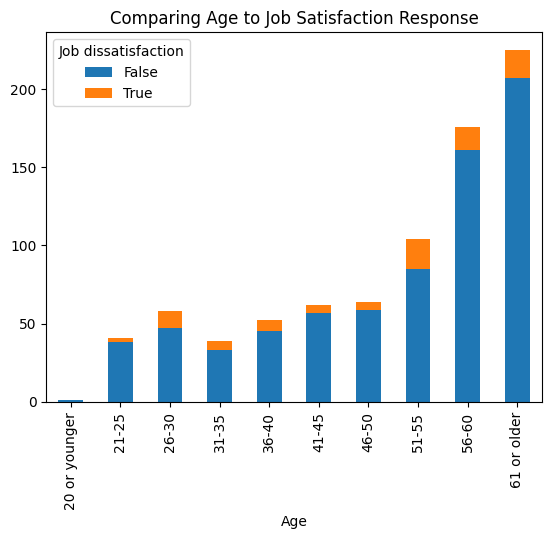

In [125]:
plt.figure(figsize = (10, 6))

crosstab = pd.crosstab(df['Age'], df['Job dissatisfaction'])

crosstab.plot(kind = 'bar', stacked = True, title = 'Comparing Age to Job Satisfaction Response')

plt.show()

<Figure size 1000x600 with 0 Axes>

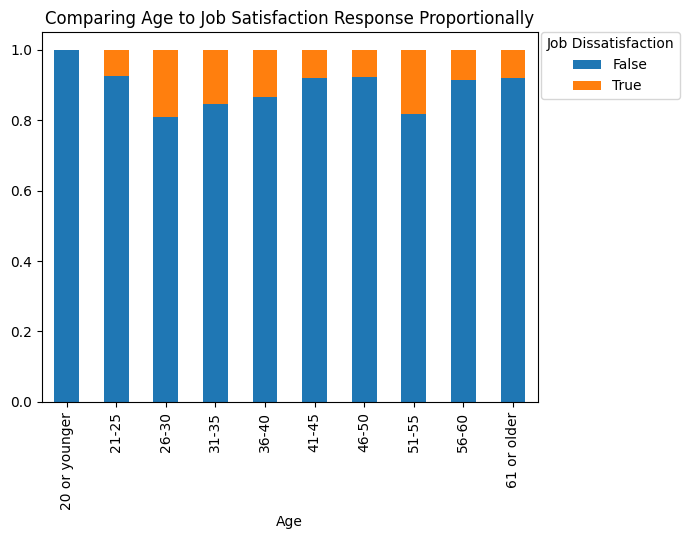

In [135]:
plt.figure(figsize = (10, 6))

crosstab_prop = crosstab.div(crosstab.sum(1), axis = 0)

crosstab_prop.plot(kind = 'bar', stacked = True, title = 'Comparing Age to Job Satisfaction Response Proportionally')

plt.legend(title='Job Dissatisfaction', bbox_to_anchor=(1.30, 1.02), loc='upper right')

plt.show()

<Figure size 1000x600 with 0 Axes>

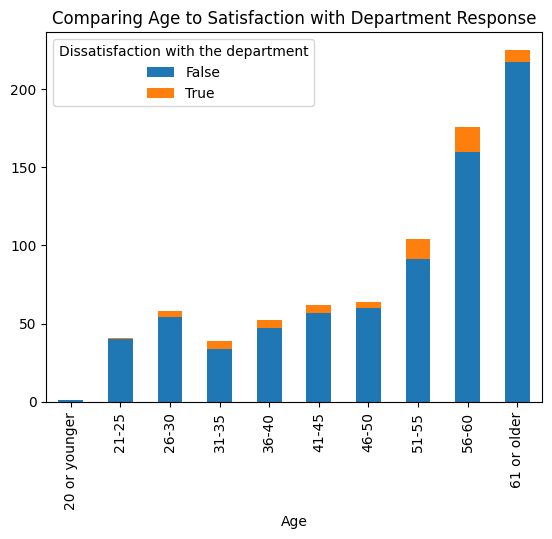

In [136]:
plt.figure(figsize = (10, 6))

crosstab02 = pd.crosstab(df['Age'], df['Dissatisfaction with the department'])

crosstab02.plot(kind = 'bar', stacked = True, title = 'Comparing Age to Satisfaction with Department Response')

plt.show()

<Figure size 1000x600 with 0 Axes>

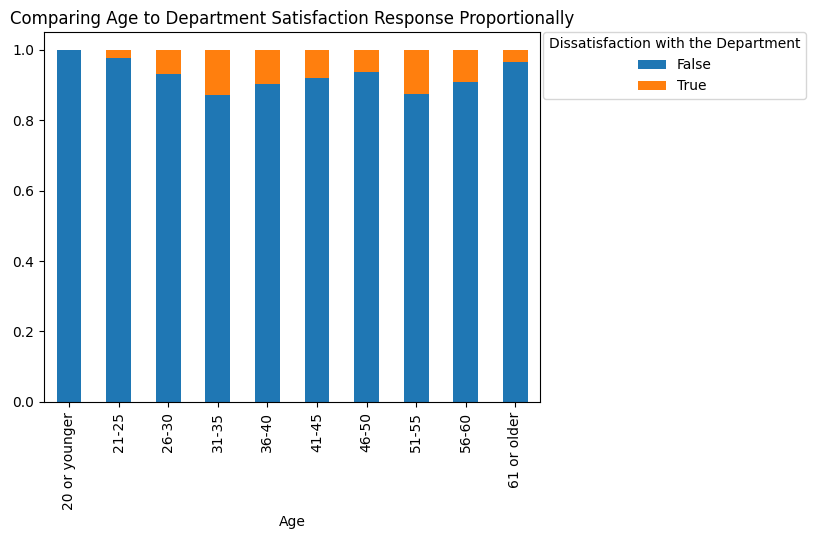

In [139]:
plt.figure(figsize = (10, 6))

crosstab_prop01 = crosstab02.div(crosstab02.sum(1), axis = 0)

crosstab_prop01.plot(kind = 'bar', stacked = True, title = 'Comparing Age to Department Satisfaction Response Proportionally')

plt.legend(title = 'Dissatisfaction with the Department', bbox_to_anchor=(1.55, 1.02), loc='upper right')

plt.show()

<mark>Too much of an imbalance to say definitively, but doesn't appear to be much of a relationship to age and satisfaction either<mark>

# Extras
**Starting with more feature engineering**

In [10]:
df.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Region', 'Employment Status',
       'Career move to public sector', 'Career move to private sector',
       'Interpersonal conflicts', 'Job dissatisfaction',
       'Dissatisfaction with the department', 'Physical work environment',
       'Lack of recognition', 'Lack of job security', 'Work location',
       'Employment conditions', 'Maternity/family', 'Relocation',
       'Study/Travel', 'Ill Health', 'Traumatic incident', 'Work life balance',
       'Workload', 'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Information',
       'Kept informed', 'Wellness 

In [18]:
df[['Job dissatisfaction', 'Dissatisfaction with the department']].value_counts()

Job dissatisfaction  Dissatisfaction with the department
False                False                                  696
True                 False                                   65
False                True                                    37
True                 True                                    24
Name: count, dtype: int64

In [9]:
#Combining a general dissatisfaction column from the dissatisfaction with job and department features

df['General Dissatisfaction'] = df['Job dissatisfaction'] | df['Dissatisfaction with the department'] | df['Physical work environment'] | df['Lack of recognition'] | df['Lack of job security'] | df['Work location'] | df['Workload']

In [10]:
#Creating a new data frame to preserve original

df['Career Move'] = df['Career move to public sector'] | df['Career move to private sector']

df01 = df.copy()

df01.drop(
    columns = ['Career move to public sector', 'Career move to private sector', 'Job dissatisfaction', 'Dissatisfaction with the department', 'Physical work environment', 'Lack of recognition', 'Lack of job security', 'Work location', 'Workload'],
inplace = True
)

## Starting with Logistic Regression using Logit for print out

In [11]:
df01.drop(columns = 'ID', inplace = True)

df01 = df01.dropna()

X = df01.drop(columns = ['General Dissatisfaction'])
y = df01['General Dissatisfaction']

y.astype(int)

X = sm.add_constant(X)

In [12]:
#Encoding object columns

#Adding all object columns to a list

object_columns = X.select_dtypes(include = ['object']).columns

#Dropping Age and Gender because they are different categories than the rest

object_columns = object_columns.drop(['Age', 'Gender'])

#One hot encoding Gender

X = pd.get_dummies(X, columns = ['Gender'], drop_first = True)

#Defining Age categories and order

age_order = CategoricalDtype(categories = ['20 or younger', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61 or older'], ordered = True)

#Encoding Age

X['Age'] = df['Age'].astype(age_order)

X['Age'] = X['Age'].cat.codes

#Defining Likert scale order

object_order = CategoricalDtype(categories = ['M', 'SD', 'D', 'N', 'A', 'SA'], ordered = True)

#Iterating through and encoding columns

for col in object_columns:
    X[col] = X[col].astype(object_order)
    X[col] = X[col].cat.codes


#Encode boolean columns as numeric

bool_columns = X.select_dtypes(include = ['boolean']).columns

for col in bool_columns:
    X[col] = X[col].astype(int)

In [13]:
#Logit model resulting in error because of singular matrix so removing duplicate columns and columns with the same value for every instance

duplicates = X.T.duplicated()
X = X.loc[:, ~duplicates]

X.drop(columns = 'SeparationType', inplace = True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 2)

model = Logit(y_train, X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.402187
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     General Dissatisfaction   No. Observations:                  503
Model:                               Logit   Df Residuals:                      468
Method:                                MLE   Df Model:                           34
Date:                     Sat, 14 Dec 2024   Pseudo R-squ.:                  0.3521
Time:                             15:05:05   Log-Likelihood:                -202.30
converged:                            True   LL-Null:                       -312.26
Covariance Type:                 nonrobust   LLR p-value:                 4.491e-29
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.3096      0.846      3.914      0.000       1.652       4.967
Interpersonal conflicts         1.3773      0.693      1.986      0.047       0.018       2.736
Employment conditions          -0.0002      0.653     -0.000      1.000      -1.281       1.281
Maternity/family               -0.5514      0.501     -1.100      0.271      -1.534       0.431
Relocation                     -1.2978      0.507     -2.558      0.011      -2.292      -0.304
Study/Travel                   -0.8577      0.649     -1.322      0.186      -2.129       0.414
Ill Health                     -1.6575      0.421     -3.937      0.000      -2.483      -0.832
Traumatic incident             -2.3155      0.739     -3.135      0.002      -3.763      -0.868
Work life balance              -0.8832      0.342     -2.581      0.010      -1.554      -0.213
None of the above              -4.8502      0.716     -6.778      0.000      -6.253      -3.448
Professional Development        0.2372      0.154      1.545      0.122      -0.064       0.538
Opportunities for promotion    -0.0635      0.142     -0.446      0.656      -0.343       0.216
Staff morale                   -0.2664      0.172     -1.552      0.121      -0.603       0.070
Workplace issue                -0.0491      0.166     -0.296      0.768      -0.375       0.276
Physical environment            0.1548      0.148      1.045      0.296      -0.135       0.445
Worklife balance               -0.1225      0.152     -0.809      0.419      -0.420       0.174
Stress and pressure support    -0.5316      0.189     -2.812      0.005      -0.902      -0.161
Performance of supervisor      -0.0604      0.165     -0.366      0.715      -0.384       0.263
Peer support                    0.6223      0.174      3.578      0.000       0.281       0.963
Initiative                     -0.1297      0.189     -0.686      0.493      -0.500       0.241
Skills                         -0.0203      0.159     -0.128      0.898      -0.331       0.291
Coach                          -0.1812      0.147     -1.234      0.217      -0.469       0.107
Career Aspirations             -0.1277      0.155     -0.826      0.409      -0.431       0.175
Feedback                        0.1532      0.181      0.848      0.396      -0.201       0.507
Further PD                     -0.3798      0.177     -2.144      0.032      -0.727      -0.033
Communication                   0.1086      0.187      0.582      0.561      -0.257       0.474
My say                          0.1709      0.199      0.858      0.391      -0.219       0.561
Information                    -0.1772      0.215     -0.826      0.409      -0.598       0.243
Kept informed                  -0.2796      0.212     -1.319      0.187      -0.695       0.136
Wellness programs              -0.0044      0.134     -0.033      0.974      -0.266       0.257
Health & Safety             

In [20]:
#Removing p values of more than .1 and running again

X01 = X.drop(columns = ['Gender_Male', 'Length', 'Age', 'Health & Safety', 'Wellness programs', 'Information', 'My say', 'Communication', 'Feedback', 'Career Aspirations', 'Coach', 'Skills', 'Initiative', 'Performance of supervisor', 'Workplace issue', 'Employment conditions', 'Opportunities for promotion'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X01, y, test_size = .3, random_state = 3)

model01 = Logit(y_train, X_train)
result01 = model01.fit()
result01.summary()

Optimization terminated successfully.
         Current function value: 0.410538
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     General Dissatisfaction   No. Observations:                  503
Model:                               Logit   Df Residuals:                      485
Method:                                MLE   Df Model:                           17
Date:                     Sat, 14 Dec 2024   Pseudo R-squ.:                  0.3387
Time:                             15:05:12   Log-Likelihood:                -206.50
converged:                            True   LL-Null:                       -312.26
Covariance Type:                 nonrobust   LLR p-value:                 1.370e-35
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.5140      0.688      5.110      0.000       2.166       4.862
Interpersonal conflicts         0.3509      0.608      0.577      0.564      -0.841       1.542
Maternity/family               -0.1722      0.446     -0.386      0.700      -1.047       0.703
Relocation                     -1.7070      0.529     -3.225      0.001      -2.744      -0.670
Study/Travel                   -0.6076      0.589     -1.031      0.302      -1.762       0.547
Ill Health                     -1.1682      0.371     -3.146      0.002      -1.896      -0.441
Traumatic incident             -1.7135      0.711     -2.410      0.016      -3.107      -0.320
Work life balance              -0.4594      0.303     -1.518      0.129      -1.053       0.134
None of the above              -4.8752      0.808     -6.034      0.000      -6.459      -3.292
Professional Development       -0.0215      0.138     -0.155      0.877      -0.292       0.249
Staff morale                   -0.3562      0.139     -2.562      0.010      -0.629      -0.084
Physical environment            0.1077      0.143      0.755      0.450      -0.172       0.387
Worklife balance               -0.1440      0.139     -1.034      0.301      -0.417       0.129
Stress and pressure support    -0.3844      0.158     -2.433      0.015      -0.694      -0.075
Peer support                    0.3844      0.162      2.366      0.018       0.066       0.703
Further PD                     -0.5068      0.150     -3.374      0.001      -0.801      -0.212
Kept informed                  -0.0943      0.150     -0.627      0.530      -0.389       0.200
Career Move                    -0.4723      0.337     -1.401      0.161      -1.133       0.189
===============================================================================================
"""

In [22]:
preds = result01.predict(X_test)

preds_labels = (preds >= .5).astype(int)

confusion_matrix(y_test, preds_labels)

array([[134,  20],
       [ 21,  41]], dtype=int64)

In [23]:
print(classification_report(y_test, preds_labels))

              precision    recall  f1-score   support

       False       0.86      0.87      0.87       154
        True       0.67      0.66      0.67        62

    accuracy                           0.81       216
   macro avg       0.77      0.77      0.77       216
weighted avg       0.81      0.81      0.81       216



<mark>Initial result is better than random guessing.  It's a 70/30 proportion for the target class and accuracy is 79%.  Precision and Recall are better for False values than for True, to be expected given limited sample size.  Will drop more columns and see if similar results can be achieved<mark>

In [28]:
X02 = X01.drop(columns = ['Interpersonal conflicts', 'Maternity/family', 'Study/Travel', 'Professional Development', 'Physical environment', 'Worklife balance', 'Kept informed', 'Career Move'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X02, y, test_size = .3, random_state = 4)

model02 = Logit(y_train, X_train)
result02 = model02.fit()
result02.summary()

Optimization terminated successfully.
         Current function value: 0.422202
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     General Dissatisfaction   No. Observations:                  503
Model:                               Logit   Df Residuals:                      493
Method:                                MLE   Df Model:                            9
Date:                     Sat, 14 Dec 2024   Pseudo R-squ.:                  0.3090
Time:                             15:10:42   Log-Likelihood:                -212.37
converged:                            True   LL-Null:                       -307.35
Covariance Type:                 nonrobust   LLR p-value:                 4.189e-36
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.6653      0.543      4.908      0.000       1.601       3.730
Relocation                     -1.9815      0.565     -3.505      0.000      -3.090      -0.873
Ill Health                     -0.9982      0.335     -2.983      0.003      -1.654      -0.342
Traumatic incident             -1.0851      0.559     -1.941      0.052      -2.181       0.011
Work life balance              -0.4829      0.272     -1.778      0.075      -1.015       0.050
None of the above              -4.3924      0.762     -5.763      0.000      -5.886      -2.899
Staff morale                   -0.2615      0.128     -2.038      0.042      -0.513      -0.010
Stress and pressure support    -0.5670      0.137     -4.150      0.000      -0.835      -0.299
Peer support                    0.3581      0.150      2.384      0.017       0.064       0.652
Further PD                     -0.3641      0.114     -3.205      0.001      -0.587      -0.141
===============================================================================================
"""

In [30]:
preds = result02.predict(X_test)

preds_labels = (preds >= .5).astype(int)

print(classification_report(y_test, preds_labels))

              precision    recall  f1-score   support

       False       0.84      0.90      0.87       148
        True       0.74      0.63      0.68        68

    accuracy                           0.81       216
   macro avg       0.79      0.77      0.78       216
weighted avg       0.81      0.81      0.81       216



**This model has an above baseline likelihood of predicting whether or not the person in question was dissatisfied with the job/department in some way.  The model has a strong ability to predict the negative (both completely with recall and accurately with precision) than the positive, likely due to the fact there are more 'False' instances of dissatisfaction to train on.  The most significant predictor of not being dissatisfied given the data is if the employee selected "None of the Above" as a reason for leaving.  The most surprising is having more Peer Support leads to more dissatisfaction...maybe peer support is interpreted as group of people to complain too.  But most likely it's an aberration.  Practically, I would focus on Stress and Pressure Support, Work-Life Balance and Morale as those are the significant predictors within the employers control that lead to a decrease in general dissatisfaction**

# Random Forest Ensemble
**Starting with shallow trees for intrepretability**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 5)

In [16]:
rf_model = RandomForestClassifier(n_estimators = 50, max_depth = 5, min_samples_split = 10, random_state = 5, oob_score = True)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

       False       0.81      0.94      0.87       153
        True       0.77      0.48      0.59        63

    accuracy                           0.81       216
   macro avg       0.79      0.71      0.73       216
weighted avg       0.80      0.81      0.79       216



In [17]:
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by = 'Importance', ascending = False)

feature_importances

,Feature,Importance
12,Staff morale,0.107154
9,None of the above,0.087305
13,Workplace issue,0.079225
17,Performance of supervisor,0.074910
23,Feedback,0.062262
16,Stress and pressure support,0.058344
15,Worklife balance,0.048479
26,My say,0.047602
29,Wellness programs,0.043740
10,Professional Development,0.033632


In [18]:
rf_model.oob_score_

0.7634194831013916

**The accuracy of 81% is the same as the Logit model, though it comes at the sacrifice of missing more employees who show some dissatisfaction with their job.  The OOB score of 76.3% shows that the model generalizes fairly well, still room for improvement however.  We'll reserve final judgement for the moment, but the initial conclusion is that the Logit model is better because it captures more employees who exhibit dissatisfaction and that's a more important metric in this context**

**Side note, the most important feature for predictions in this model is Staff Morale followed by None of the Above.  None of the above doesn't help, and Morale is a squishy one, and one that is most likely affected by other attributes so might be interesting to drop that as a feature and see if others bubble up in importance**

## RandomForest with parameter tuning

In [33]:
parameters = {
    'n_estimators': [25, 50, 100, 300],
    'max_depth': [1, 5, 15, None],
    'min_samples_split': [2, 5, 10, 30],
    'max_features': [2, 10, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 5, 10, 20]
}

tuned_params = GridSearchCV(
    rf_model, 
    parameters, 
    cv = 5, 
    return_train_score = True, 
    scoring = 'recall',
    verbose = 1
)

tuned_params.fit(X_train, y_train)

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
[CV] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_de

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, min_samples_split=10,
                                              n_estimators=50, oob_score=True,
                                              random_state=5),
             param_grid={'max_depth': [1, 5, 15, None],
                         'max_features': [2, 10, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 30],
                         'n_estimators': [25, 50, 100, 300]},
             return_train_score=True, scoring='recall', verbose=2)

In [34]:
tuned_params.best_params_

{'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [35]:
tuned_params.best_score_

0.6151209677419355

### Tuned Model

In [36]:
rf_tuned = RandomForestClassifier(
    n_estimators = 100, 
    max_depth = 15, 
    min_samples_split = 5, 
    min_samples_leaf = 1,
    max_features = 10, 
    random_state = 6, 
    oob_score = True
)

rf_tuned.fit(X_train, y_train)

rf_preds_tuned = rf_tuned.predict(X_test)

print(classification_report(y_test, rf_preds_tuned))

              precision    recall  f1-score   support

       False       0.85      0.90      0.88       153
        True       0.72      0.62      0.67        63

    accuracy                           0.82       216
   macro avg       0.79      0.76      0.77       216
weighted avg       0.81      0.82      0.82       216



In [37]:
importances = rf_tuned.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by = 'Importance', ascending = False)

feature_importances

,Feature,Importance
12,Staff morale,0.088613
9,None of the above,0.080594
13,Workplace issue,0.075205
32,Length,0.065782
17,Performance of supervisor,0.057762
16,Stress and pressure support,0.049175
15,Worklife balance,0.045075
31,Age,0.038676
23,Feedback,0.038417
29,Wellness programs,0.038078


**Parameter tuning improved model slightly in accuracy and f1-score for False responses, but worse f1-score for True values, so current recommendation is to use the simpler Logit model, and to gauge how current employees feel in terms of Stress and Pressure Support, and their perception of work life balance.  It also makes sense to survey Staff Morale, and then dig in with employees who rate morale lower on the scale to determine why they gave morale a lower rating (this can be done anonymously in the same survey, or employees can indicate they're open to discussion about it).  These steps can increase engagement among managers, reduce turnover, and give employees a stronger perception that their feedback and input matter which is a positive for satisfied and dissatisfied employees**